In [1]:
#pip install tensorflow

In [3]:

# Importing required modules
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback 
import tensorflow.keras.layers as layers
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm

In [4]:
# Utility functions
def print_shapes(x_train, x_test, y_train, y_test):
    print(f"x_train: {x_train.shape}\n"\
      f"x_test: {x_test.shape}\n"\
      f"y_train: {y_train.shape}\n"\
      f"y_test: {y_test.shape}\n")

In [91]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing images and labels
height, width, channels = 32, 32, 3
nb_classes = 3
label_names_antic = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

label_names = ['auth','nonauth','animal']

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, height, width, channels))
x_test = x_test.reshape((-1, height, width, channels))


def changeLabels(y):
    for i in range(len(y)):
        if y[i][0] < 2:
            y[i] = [0]
        elif y[i][0] < 8:
            y[i] = [2]
        else:
            y[i] = [1]
    return y

y_train = changeLabels(y_train)
y_test = changeLabels(y_test)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

y_train_o = y_train.copy()
x_train_o = x_train.copy()

In [20]:
# Create the model
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),  # Input layer with correct image shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dense(nb_classes, activation="softmax"), # Output layer for binary classification
    ]
)


# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,251 (364.26 KB)

 Trainable params: 93,251 (364.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7092 - loss: 0.3968 - val_accuracy: 0.8140 - val_loss: 0.2776
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8127 - loss: 0.2828 - val_accuracy: 0.8234 - val_loss: 0.2702
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8310 - loss: 0.2576 - val_accuracy: 0.8498 - val_loss: 0.2336
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8454 - loss: 0.2423 - val_accuracy: 0.8575 - val_loss: 0.2278
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8561 - loss: 0.2293 - val_accuracy: 0.8658 - val_loss: 0.2138
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8632 - loss: 0.2173 - val_accuracy: 0.8649 - val_loss: 0.2185
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8701 - loss: 0.2098 - val_accuracy: 0.8769 - val_loss: 0.1997
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8734 - loss: 0.2032 - 

In [46]:
# save the model for later use
model.save("cifar10_model.keras")

In [48]:
def generate_adversary_own(image,model):
    
    label = np.array([0.0, 1.0, 0.0], dtype=np.float32) # nonauth label
    
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)

        loss = tf.keras.losses.MSE(label, prediction) # assumim que sempre tenim nonauth, ja que no tenim l'etiqueta real, i aixi intentara canviar els nonauth
    
    gradient = tape.gradient(loss, image)
    sign_grad = tf.sign(gradient)
    return sign_grad

In [86]:
def generateImageWithNoise(noise, image,model):
    # Adding the adversary noise to image
    image = image.reshape((1, 32, 32, 3))
    perturbations = generate_adversary_own(image,model).numpy()
        
    adversarial = image + (perturbations * noise)
    adversarial = np.clip(adversarial, 0.0, 1.0)
    return adversarial.reshape((32, 32, 3))

In [90]:
noise = 0.005
iter = 0

x_train_modified = np.array([generateImageWithNoise(noise,image,model) for image in x_train])

x_train = np.concatenate((x_train, x_train_modified), axis=0)

y_train = np.concatenate((y_train, y_train), axis=0)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (100000, 32, 32, 3)
y_train shape: (100000, 3)


In [92]:
# Create the model
model2 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),  # Input layer with correct image shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dense(nb_classes, activation="softmax"), # Output layer for binary classification
    ]
)


# Compile the model
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.summary()

# Train the model
history2 = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,251 (364.26 KB)

 Trainable params: 93,251 (364.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8905 - loss: 0.1814 - val_accuracy: 0.8954 - val_loss: 0.1747
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8916 - loss: 0.1764 - val_accuracy: 0.8948 - val_loss: 0.1759
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8989 - loss: 0.1674 - val_accuracy: 0.8920 - val_loss: 0.1776
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8986 - loss: 0.1666 - val_accuracy: 0.8973 - val_loss: 0.1694
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9009 - loss: 0.1616 - val_accuracy: 0.8986 - val_loss: 0.1679
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9049 - loss: 0.1572 - val_accuracy: 0.8913 - val_loss: 0.1790
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9038 - loss: 0.1578 - val_accuracy: 0.8971 - val_loss: 0.1685
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9100 - loss: 0.1508 - 

In [93]:
# save the model for later use
model2.save("cifar10_model_2.keras")

In [94]:
noise = 0.01
iter = 0

x_train_modified = np.array([generateImageWithNoise(noise,image,model) for image in x_train_o])

x_train = np.concatenate((x_train_o, x_train_modified), axis=0)

y_train = np.concatenate((y_train_o, y_train_o), axis=0)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (100000, 32, 32, 3)
y_train shape: (100000, 3)


In [95]:
# Create the model
model3 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),  # Input layer with correct image shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dense(nb_classes, activation="softmax"), # Output layer for binary classification
    ]
)


# Compile the model
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.summary()

# Train the model
history3 = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,251 (364.26 KB)

 Trainable params: 93,251 (364.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9074 - loss: 0.1556 - val_accuracy: 0.8935 - val_loss: 0.1763
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9138 - loss: 0.1464 - val_accuracy: 0.8964 - val_loss: 0.1725
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9138 - loss: 0.1421 - val_accuracy: 0.8948 - val_loss: 0.1768
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9186 - loss: 0.1375 - val_accuracy: 0.9092 - val_loss: 0.1530
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9205 - loss: 0.1347 - val_accuracy: 0.8884 - val_loss: 0.1834
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9239 - loss: 0.1310 - val_accuracy: 0.8904 - val_loss: 0.1806
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9257 - loss: 0.1259 - val_accuracy: 0.9050 - val_loss: 0.1604
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9270 -

In [96]:
# save the model for later use
model3.save("cifar10_model_3.keras")

In [97]:
noise = 0.05

x_train_modified = np.array([generateImageWithNoise(noise,image,model) for image in x_train_o])

x_train = np.concatenate((x_train_o, x_train_modified), axis=0)

y_train = np.concatenate((y_train_o, y_train_o), axis=0)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (100000, 32, 32, 3)
y_train shape: (100000, 3)


In [98]:
# Create the model
model4 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),  # Input layer with correct image shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dense(nb_classes, activation="softmax"), # Output layer for binary classification
    ]
)


# Compile the model
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.summary()

# Train the model
history4 = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,251 (364.26 KB)

 Trainable params: 93,251 (364.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8975 - loss: 0.1746 - val_accuracy: 0.9039 - val_loss: 0.1637
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9152 - loss: 0.1444 - val_accuracy: 0.8811 - val_loss: 0.1949
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9230 - loss: 0.1345 - val_accuracy: 0.9093 - val_loss: 0.1587
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9234 - loss: 0.1335 - val_accuracy: 0.9035 - val_loss: 0.1653
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9254 - loss: 0.1308 - val_accuracy: 0.9060 - val_loss: 0.1608
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9259 - loss: 0.1280 - val_accuracy: 0.9012 - val_loss: 0.1653
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9270 - loss: 0.1259 - val_accuracy: 0.9089 - val_loss: 0.1596
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9278 -

In [99]:
# save the model for later use
model4.save("cifar10_model_4.keras")

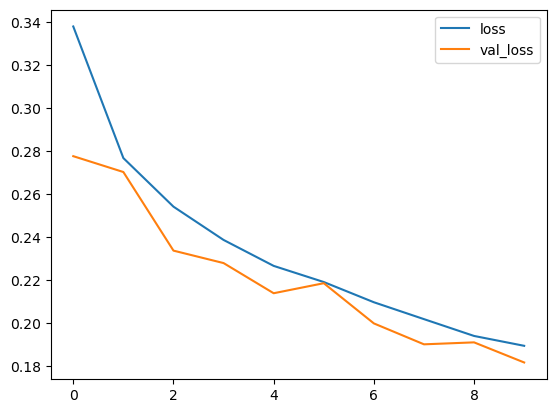

In [58]:
# plotting loss
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

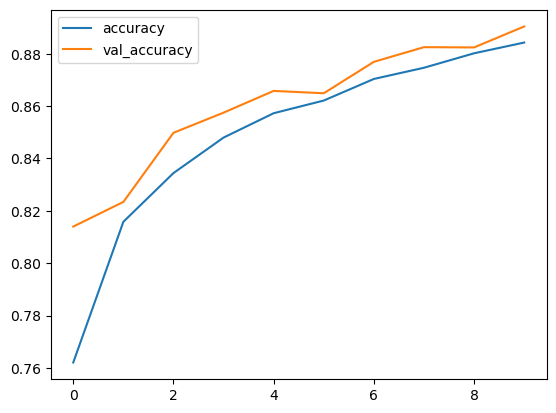

In [60]:
# plotting accuracy
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted Label: nonauth
Confidence: 0.9330548048019409


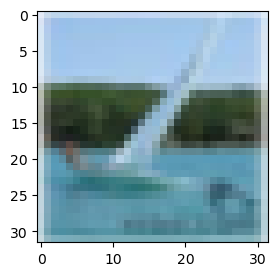

In [62]:
# Selecting random image for testing
rand_idx = randint(0,49999)
image = x_train[rand_idx].reshape((1, height, width, channels))
label = y_train[rand_idx]

label_pred=model.predict(image)
predicted_label = np.argmax(label_pred, axis=1)[0]

print(f'Predicted Label: {label_names[predicted_label]}')
print(f'Confidence: {label_pred[0][predicted_label]}')
plt.figure(figsize=(3,3))
plt.imshow(image.reshape((height, width, channels)))
plt.show()

In [64]:
# Function to calculate adversary noise
def generate_adversary(image, label):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
        print(label)
        print(prediction)
        print(loss)
    gradient = tape.gradient(loss, image)
    sign_grad = tf.sign(gradient)
    return sign_grad

In [66]:
# Adding the adversary noise to image
print(type(image))
perturbations = generate_adversary(image,label).numpy()

adversarial = image + (perturbations * 0.05)
print(image)

<class 'numpy.ndarray'>
[0. 1. 0.]
tf.Tensor([[0.06029889 0.9330548  0.00664626]], shape=(1, 3), dtype=float32)
tf.Tensor([0.0027206], shape=(1,), dtype=float32)
[[[[0.89411765 0.91764706 0.96862745]
   [0.79215686 0.85490196 0.9254902 ]
   [0.74901961 0.83921569 0.9254902 ]
   ...
   [0.76862745 0.85098039 0.94509804]
   [0.8        0.86666667 0.95294118]
   [0.8745098  0.9254902  0.97254902]]

  [[0.85490196 0.89019608 0.95686275]
   [0.70588235 0.78431373 0.90588235]
   [0.62352941 0.74509804 0.90588235]
   ...
   [0.62745098 0.76862745 0.91764706]
   [0.68627451 0.8        0.93333333]
   [0.81960784 0.89411765 0.96078431]]

  [[0.84313725 0.90196078 0.96078431]
   [0.69803922 0.79215686 0.9254902 ]
   [0.61960784 0.74901961 0.9254902 ]
   ...
   [0.63137255 0.77254902 0.9254902 ]
   [0.69803922 0.80392157 0.92941176]
   [0.83921569 0.89411765 0.94901961]]

  ...

  [[0.74901961 0.83529412 0.87058824]
   [0.48627451 0.65882353 0.7254902 ]
   [0.34901961 0.58431373 0.6627451 ]
   ...

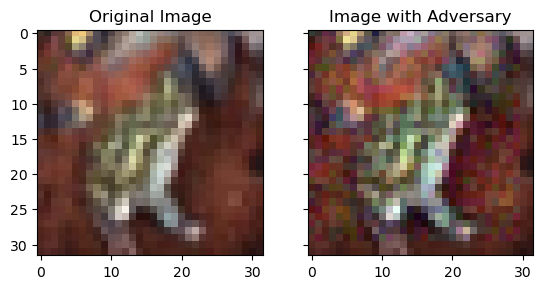

In [113]:
# Comparing both images 
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
ax2.imshow(adversarial.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

In [115]:
print(f'Normal Image Prediction:')
print(f'\tPredicted Label: {label_names[model.predict(image).argmax()]}')
print(f'\tConfidence: {model.predict(image).max()}')


print(f'Adversarial Image Prediction:')
print(f'\tPredicted Label: {label_names[model.predict(adversarial).argmax()]}')
print(f'\tConfidence: {model.predict(adversarial).max()}')

Normal Image Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
	Predicted Label: animal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
	Confidence: 0.999997615814209
Adversarial Image Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
	Predicted Label: nonauth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
	Confidence: 0.9913553595542908
